In [4]:
import numpy as np

import random

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import learning_curve

import h5py

import time

import matplotlib.pyplot as plt 

In [5]:
# Importation du jeux d'entraînement
f = h5py.File("train.hdf5", 'r')
train_x, train_y = f['image'][...], f['label'][...]
f.close()

# Importation du jeux de test
f = h5py.File("test.hdf5", 'r')
test_x, test_y = f['image'][...], f['label'][...]
f.close()

etiquette= np.unique(test_y)
print(f"Entrainement: X Shape: {train_x.shape}, Y shape: {train_y.shape}\n"+\
      f"Test: X Shape: {test_x.shape}, Y shape: {test_y.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (60000, 28, 28), Y shape: (60000,)
Test: X Shape: (10000, 28, 28), Y shape: (10000,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [3]:
# On récupère les données. On ne prendra qu'une partie des données situé dans le
#  jeux de train. On en profite pour "applatir" les images
data= train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])

# On réduit le jeux de données original
data_red, _, Y_red, _=  train_test_split(data, train_y, train_size=0.1, random_state= 65)

# On split le jeux de données
X_train_red, X_test_red,  Y_train_red, Y_test_red = train_test_split(data_red, Y_red, train_size=0.8, 
                                                               random_state= 65)

print(f"Entrainement: X Shape: {X_train_red.shape}, Y shape: {Y_train_red.shape}\n"+\
      f"Test: X Shape: {X_test_red.shape}, Y shape: {Y_test_red.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (4800, 784), Y shape: (4800,)
Test: X Shape: (1200, 784), Y shape: (1200,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [4]:
# On réalise un pipe avec 2 actions: un scaler et un algorithme
pipe = Pipeline(steps= [('scaler', StandardScaler()), ('algo', LogisticRegression())])

# On testera 3 standardisations et pour la régression logistique on testera tout les solvers
param_grid = {'pipeline__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
              'pipeline__algo__solver': ["sag", "newton-cg", "lbfgs", "saga"],
              'pipeline__algo__class_weight': ["balanced"],
              'pipeline__algo__max_iter': [2000]}
# instantiate and run as before:

model= make_pipeline(pipe)

grid = GridSearchCV(model, param_grid, cv=5, verbose= True, n_jobs= -1)

grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pipeline',
                                        Pipeline(steps=[('scaler',
                                                         StandardScaler()),
                                                        ('algo',
                                                         LogisticRegression())]))]),
             n_jobs=-1,
             param_grid={'pipeline__algo__class_weight': ['balanced'],
                         'pipeline__algo__max_iter': [2000],
                         'pipeline__algo__solver': ['sag', 'newton-cg', 'lbfgs',
                                                    'saga'],
                         'pipeline__scaler': [StandardScaler(), MinMaxScaler(),
                                              RobustScaler()]},
             verbose=True)

In [5]:
deb= time.time()

grid.fit(X_train_red, Y_train_red)

fin= time.time()
print(f"temps d'exécution: {fin-deb:.2f} s")

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The m

temps d'exécution: 25717.32 s


/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jpphi/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

In [6]:
grid.best_estimator_

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('algo',
                                  LogisticRegression(class_weight='balanced',
                                                     max_iter=2000,
                                                     solver='newton-cg'))]))])

In [9]:
print(f"Précision obtenu: {100*grid.best_score_:.2f} %")

Précision obtenu: 88.40 %


In [10]:
grid.cv_results_

{'mean_fit_time': array([1827.04314895,  231.22088594, 1876.71221666,   50.39220605,
          28.83537464, 6369.41644335,   39.99096208,   34.12389121,
         205.87793794, 4317.14377704,  846.24480405, 3789.71036057]),
 'std_fit_time': array([ 69.38440553,  19.76828982,  40.31343365,   4.04969178,
          1.04618263, 782.92065579,   1.15738383,   1.59141662,
          9.02821649, 241.04689359,  29.54919976, 491.74400633]),
 'mean_score_time': array([0.03037901, 0.02316012, 0.02717633, 0.02764368, 0.02633514,
        0.03002439, 0.03254666, 0.03047953, 0.04181418, 0.03306494,
        0.02190456, 0.02446933]),
 'std_score_time': array([0.00189925, 0.00016107, 0.00299612, 0.00048742, 0.00187839,
        0.00189033, 0.00155231, 0.00413801, 0.01591045, 0.0098092 ,
        0.00038109, 0.00527098]),
 'param_pipeline__algo__class_weight': masked_array(data=['balanced', 'balanced', 'balanced', 'balanced',
                    'balanced', 'balanced', 'balanced', 'balanced',
                

In [15]:
# on teste sur les données de.... test :)
prediction = grid.predict(X_test_red)
erreur= 0
longueur= len(Y_test_red)
for i in range(longueur):
    if Y_test_red[i]!= prediction[i]: erreur+= 1
print(f"{erreur} erreurs sur {longueur} images soit une précision de {100*(1-erreur/longueur):.2f} %")

111 erreurs sur 1200 images soit une précision de 90.75 %


In [18]:
target_names= ["détection de 0", "détection de 1", "détection de 2", "détection de 3", "détection de 4",
               "détection de 5", "détection de 6", "détection de 7", "détection de 8", "détection de 9"]
print("\n",classification_report(Y_test_red,prediction, target_names= target_names)) 


                 precision    recall  f1-score   support

détection de 0       0.95      0.98      0.96       126
détection de 1       0.93      0.98      0.96       117
détection de 2       0.95      0.83      0.89       137
détection de 3       0.83      0.88      0.85       112
détection de 4       0.93      0.91      0.92       123
détection de 5       0.86      0.84      0.85       103
détection de 6       0.97      0.96      0.97       135
détection de 7       0.91      0.91      0.91       119
détection de 8       0.83      0.87      0.85       110
détection de 9       0.88      0.90      0.89       118

      accuracy                           0.91      1200
     macro avg       0.91      0.91      0.91      1200
  weighted avg       0.91      0.91      0.91      1200



## Validation curve

In [6]:
# On récupère les données. On ne prendra qu'une partie des données situé dans le
#  jeux de train. On en profite pour "applatir" les images
data= train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])

# On réduit le jeux de données original
data_red, _, Y_red, _=  train_test_split(data, train_y, train_size=0.5, random_state= 65)

# On split le jeux de données
X_train_red, X_test_red,  Y_train_red, Y_test_red = train_test_split(data_red, Y_red, train_size=0.8, 
                                                               random_state= 65)

print(f"Entrainement: X Shape: {X_train_red.shape}, Y shape: {Y_train_red.shape}\n"+\
      f"Test: X Shape: {X_test_red.shape}, Y shape: {Y_test_red.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (24000, 784), Y shape: (24000,)
Test: X Shape: (6000, 784), Y shape: (6000,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [8]:
pipe_minmax_logreg= make_pipeline( MinMaxScaler(), 
                                  LogisticRegression(class_weight='balanced', max_iter=2000, solver='newton-cg'))

In [9]:
pipe_minmax_logreg.fit(X_train_red, Y_train_red)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    solver='newton-cg'))])

array([4, 6, 1, ..., 6, 9, 2], dtype=uint8)

In [11]:
prediction = pipe_minmax_logreg.predict(X_test_red)
erreur= 0
longueur= len(Y_test_red)
for i in range(longueur):
    if Y_test_red[i]!= prediction[i]: erreur+= 1
print(f"{erreur} erreurs sur {longueur} images soit une précision de {100*(1-erreur/longueur):.2f} %")

549 erreurs sur 6000 images soit une précision de 90.85 %


In [12]:
train_size, train_score, val_score= learning_curve(pipe_minmax_logreg, X_train_red, Y_train_red, 
                                          train_sizes= np.linspace(0.05,1,15), cv= 3)

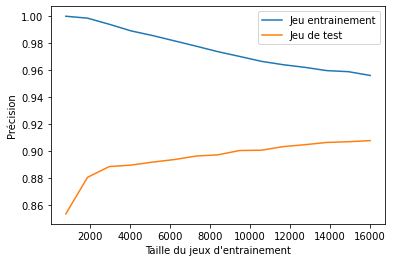

In [13]:
plt.plot(train_size, train_score.mean(axis=1), label= "Jeu entrainement")
plt.plot(train_size, val_score.mean(axis=1), label= "Jeu de test")
plt.xlabel("Taille du jeux d'entrainement")
plt.ylabel("Précision")
_= plt.legend()

In [38]:
def erreur_prediction(valeurs_predites= None, valeurs_reelle= None):
    """
    Vérifie que les valeurs prédites sont les mêmes que les valeurs réelles.
    
    paramètres en entrée:
    valeurs_predites
    valeurs_reelle
    
    Paramètres de sortie:
    erreur: nombre d'erreur de prédiction
    precision: 100*(1-erreur/(longueur des tableaux)
    liste_erreur: Liste de toutes les erreurs détecté sous forme de dictionnaire 
        clé valeur réelle: valeur prédite
    """
    
    assert len(valeurs_predites) == len(valeurs_reelle), "Erreur de dimension: la dimension des tableaux "+\
        f"doit être identique. {len(valeurs_predites)} # de {len(valeurs_reelle)}"

    erreur= 0
    d= {}
    longueur= len(valeurs_reelle)
    for i in range(longueur):
        if valeurs_reelle[i]!= valeurs_predites[i]:
            if valeurs_reelle[i] not in d.keys():
                d[valeurs_reelle[i]]= [valeurs_predites[i]]
            else:
                d[valeurs_reelle[i]].append(valeurs_predites[i])
            erreur+= 1
        
    return erreur, 100*(1-erreur/longueur), d

In [36]:
err, pre, d= erreur_prediction(valeurs_predites= [1,1,2,0,4,1], valeurs_reelle= [1,2,2,3,2,2])

In [37]:
print(f"{err} erreurs. précision {pre:.2f} % dictionnaire: {d}")

4 erreurs. précision 33.33 % dictionnaire: {2: [1, 4, 1], 3: [0]}


In [165]:
# On récupère les données. On ne prendra qu'une partie des données situé dans le
#  jeux de train. On en profite pour "applatir" les images
data= train_x.reshape(train_x.shape[0], train_x.shape[1]*train_x.shape[2])

# On réduit le jeux de données original
data_red, _, Y_red, _=  train_test_split(data, train_y, train_size=0.8, random_state= 65)

# On split le jeux de données
X_train_red, X_test_red,  Y_train_red, Y_test_red = train_test_split(data_red, Y_red, train_size=0.8, 
                                                               random_state= 65)

print(f"Entrainement: X Shape: {X_train_red.shape}, Y shape: {Y_train_red.shape}\n"+\
      f"Test: X Shape: {X_test_red.shape}, Y shape: {Y_test_red.shape}\n"+\
      f"Etiquette: {etiquette}")

Entrainement: X Shape: (38400, 784), Y shape: (38400,)
Test: X Shape: (9600, 784), Y shape: (9600,)
Etiquette: [0 1 2 3 4 5 6 7 8 9]


In [152]:
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier

model_knn= make_pipeline(MinMaxScaler(),KNeighborsClassifier())
# On testera 3 standardisations et pour la régression logistique on testera tout les solvers
param_grid_algo = {'kneighborsclassifier__n_neighbors': [6],
                   'kneighborsclassifier__weights': ["distance"],
                   'kneighborsclassifier__algorithm': ["ball_tree"],
                   #'kneighborsclassifier__leaf_size': [20],
                    #'kneighborsclassifier__p': [5],
             }

# __sgdclassifier
# __kneighborsregressor
# LogisticRegression(max_iter= 1000)
# max_iter= 1000, tol= 1e-3
# n_neighbors= 7

In [166]:
model_knn

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [167]:

# instantiate and run as before:

#model_algo= make_pipeline(pipe_algo)

grid_algo = GridSearchCV(model_knn, param_grid_algo, cv=5, verbose= True, n_jobs= -1)

grid_algo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__algorithm': ['ball_tree'],
                         'kneighborsclassifier__n_neighbors': [6],
                         'kneighborsclassifier__weights': ['distance']},
             verbose=True)

In [155]:
grid_algo.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__memory', 'estimator__steps', 'estimator__verbose', 'estimator__minmaxscaler', 'estimator__kneighborsclassifier', 'estimator__minmaxscaler__clip', 'estimator__minmaxscaler__copy', 'estimator__minmaxscaler__feature_range', 'estimator__kneighborsclassifier__algorithm', 'estimator__kneighborsclassifier__leaf_size', 'estimator__kneighborsclassifier__metric', 'estimator__kneighborsclassifier__metric_params', 'estimator__kneighborsclassifier__n_jobs', 'estimator__kneighborsclassifier__n_neighbors', 'estimator__kneighborsclassifier__p', 'estimator__kneighborsclassifier__weights', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [168]:
deb= time.time()

grid_algo.fit(X_train_red, Y_train_red)

fin= time.time()
print(f"temps d'exécution: {fin-deb:.2f} s")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
temps d'exécution: 653.75 s


In [157]:
grid_algo.best_estimator_

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6,
                                      weights='distance'))])

In [158]:
grid_algo.best_score_

0.9464583333333334

In [ ]:
0.9491666666666665 3,25
0.9497916666666667

In [164]:
prediction = model_knn.predict(X_test_red)

err, pre, d= erreur_prediction(valeurs_predites= prediction, valeurs_reelle= Y_test_red)
print(f"{err} erreurs sur {len(Y_test_red)} images soit une précision de {pre:.2f} %")
print(f"Dictionnaire des erreurs (clé valeur réelle: valeur prédite):\n{d}")

120 erreurs sur 2400 images soit une précision de 95.00 %
Dictionnaire des erreurs (clé valeur réelle: valeur prédite):
{3: [7, 5, 8, 8, 2, 8, 2, 1, 4, 1, 5, 7, 9, 9], 7: [5, 1, 9, 4, 9, 9, 9, 9, 9, 9, 4, 1, 9, 9, 4, 4, 4, 1], 5: [3, 1, 0, 6, 6, 3, 2, 1, 3, 3, 0, 1, 7, 9, 3, 6, 6], 6: [5, 0, 0, 1, 0, 5, 0, 5], 9: [4, 7, 3, 3, 7, 4, 7, 3, 4, 7, 4], 8: [1, 1, 1, 5, 1, 3, 3, 2, 4, 4, 5, 5, 4, 5, 5, 9, 5, 5, 2, 1, 2, 1, 5], 2: [7, 8, 5, 1, 1, 7, 7, 7, 8, 1, 1, 6, 0, 0, 1, 5, 4, 0, 7], 4: [1, 1, 9, 1, 9], 0: [2, 2, 8, 6], 1: [7]}


In [148]:
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier

model_sgd= make_pipeline(MinMaxScaler(),SGDClassifier())
# On testera 3 standardisations et pour la régression logistique on testera tout les solvers
param_grid_algo = {#'sgdclassifier__n_neighbors': [6],
                   'sgdclassifier__class_weight': ["balanced", None],
                   #'sgdclassifier__algorithm': ["ball_tree"],
                   #'sgdclassifier__leaf_size': [20],
                    #'sgdclassifier__p': [5],
             }


In [149]:

grid_algo = GridSearchCV(model_sgd, param_grid_algo, cv=5, verbose= True, n_jobs= -1)

grid_algo

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('sgdclassifier', SGDClassifier())]),
             n_jobs=-1,
             param_grid={'sgdclassifier__class_weight': ['balanced', None]},
             verbose=True)

In [150]:
deb= time.time()

grid_algo.fit(X_train_red, Y_train_red)

fin= time.time()
print(f"temps d'exécution: {fin-deb:.2f} s")

Fitting 5 folds for each of 2 candidates, totalling 10 fits
temps d'exécution: 29.41 s


In [151]:
grid_algo.best_score_

0.878125